In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('grayBreastCellLines_public_grayBreastCellLineExon_genomicMatrix.csv')

In [3]:
df.head()

,probes,184A1N4,184B5,600MPE,AU565,BT20,BT474,BT483,CAMA1,HCC38,...,SUM225CWN,SUM1315MO2,T47D,UACC812,UACC893,ZR751,ZR7530,ZR75B,BT549,MCF10A
0,C9orf152,3.219861,3.613030,8.463736,7.935823,3.098928,9.010836,6.238427,7.531960,2.941374,...,7.479183,2.743167,7.885278,6.478226,8.246558,9.306710,7.672073,9.016769,3.312954,3.257463
1,ELMO2,7.766045,7.205940,7.959597,8.073369,8.164778,8.120015,8.950747,7.747369,8.551765,...,8.086427,7.653533,8.027774,8.112902,8.365841,8.274168,8.654507,7.907656,8.463506,7.348165
2,RPS11,9.667770,10.476276,9.939852,9.817430,10.038500,9.533423,9.471906,9.889735,9.852145,...,9.624821,9.447288,8.779309,9.069048,9.091773,9.333409,9.360958,10.064785,9.693886,9.858231
3,CREB3L1,5.363933,5.565989,9.835957,5.696639,4.972852,8.155372,6.437281,6.572890,7.007242,...,8.059426,7.569412,5.437983,8.168436,9.218243,7.360383,8.892531,7.051816,7.973954,5.256000
4,PNMA1,7.686377,7.664038,7.645439,7.761882,7.766212,8.393242,8.081416,7.643172,7.922658,...,7.395009,8.757817,8.315187,8.430294,8.152993,7.001755,7.582231,7.348228,8.558804,7.668157


In [4]:
df.describe()

,184A1N4,184B5,600MPE,AU565,BT20,BT474,BT483,CAMA1,HCC38,HCC70,...,SUM225CWN,SUM1315MO2,T47D,UACC812,UACC893,ZR751,ZR7530,ZR75B,BT549,MCF10A
count,18632.000000,18632.000000,18632.000000,18632.000000,18632.000000,18632.000000,18632.000000,18632.000000,18632.000000,18632.000000,...,18632.000000,18632.000000,18632.000000,18632.000000,18632.000000,18632.000000,18632.000000,18632.000000,18632.000000,18632.000000
mean,6.253046,6.306123,6.261810,6.279633,6.261440,6.268931,6.248639,6.269692,6.246562,6.314922,...,6.309594,6.280925,6.336654,6.301478,6.307631,6.286880,6.386536,6.281654,6.271193,6.281641
std,1.804928,1.747160,1.834619,1.812361,1.873340,1.854346,1.861068,1.889482,1.849244,1.753502,...,1.744429,1.767070,1.731769,1.766909,1.800506,1.772328,1.611129,1.810819,1.825541,1.766263
min,1.328817,1.469109,1.789057,1.565681,1.486068,1.549050,1.609489,1.686162,1.537051,1.839808,...,1.587285,1.723041,1.779785,1.676031,1.651959,1.543465,1.904660,1.748389,1.587403,1.537809
25%,4.920369,5.023773,4.873627,4.877826,4.825972,4.850819,4.807982,4.753376,4.822646,5.012940,...,5.033513,4.956438,5.022939,4.993551,4.926979,4.905661,5.202757,4.876771,4.847783,4.929940
50%,6.312451,6.336325,6.322637,6.265333,6.309363,6.296897,6.325321,6.331845,6.311854,6.337056,...,6.369565,6.306009,6.369344,6.364078,6.340175,6.334383,6.386279,6.293890,6.287123,6.296380
75%,7.543474,7.536420,7.595912,7.610695,7.647164,7.616926,7.618574,7.692568,7.596265,7.561076,...,7.524173,7.545892,7.569886,7.551357,7.608277,7.582627,7.485873,7.612161,7.610894,7.559465
max,12.992845,13.233989,13.342245,12.939059,12.932707,12.792920,12.914736,12.801406,12.850239,13.081640,...,13.620026,13.018694,12.700615,12.849782,13.038998,12.955221,13.496313,12.858356,13.105381,13.255293


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18632 entries, 0 to 18631
Data columns (total 55 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   probes       18632 non-null  object 
 1   184A1N4      18632 non-null  float64
 2   184B5        18632 non-null  float64
 3   600MPE       18632 non-null  float64
 4   AU565        18632 non-null  float64
 5   BT20         18632 non-null  float64
 6   BT474        18632 non-null  float64
 7   BT483        18632 non-null  float64
 8   CAMA1        18632 non-null  float64
 9   HCC38        18632 non-null  float64
 10  HCC70        18632 non-null  float64
 11  HCC202       18632 non-null  float64
 12  HCC1143      18632 non-null  float64
 13  HCC1187      18632 non-null  float64
 14  HCC1395      18632 non-null  float64
 15  HCC1419      18632 non-null  float64
 16  HCC1428      18632 non-null  float64
 17  HCC1599      18632 non-null  float64
 18  HCC1806      18632 non-null  float64
 19  HCC1

In [6]:
df1 = df.replace(0.000000,np.nan)
df1

,probes,184A1N4,184B5,600MPE,AU565,BT20,BT474,BT483,CAMA1,HCC38,...,SUM225CWN,SUM1315MO2,T47D,UACC812,UACC893,ZR751,ZR7530,ZR75B,BT549,MCF10A
0,C9orf152,3.219861,3.613030,8.463736,7.935823,3.098928,9.010836,6.238427,7.531960,2.941374,...,7.479183,2.743167,7.885278,6.478226,8.246558,9.306710,7.672073,9.016769,3.312954,3.257463
1,ELMO2,7.766045,7.205940,7.959597,8.073369,8.164778,8.120015,8.950747,7.747369,8.551765,...,8.086427,7.653533,8.027774,8.112902,8.365841,8.274168,8.654507,7.907656,8.463506,7.348165
2,RPS11,9.667770,10.476276,9.939852,9.817430,10.038500,9.533423,9.471906,9.889735,9.852145,...,9.624821,9.447288,8.779309,9.069048,9.091773,9.333409,9.360958,10.064785,9.693886,9.858231
3,CREB3L1,5.363933,5.565989,9.835957,5.696639,4.972852,8.155372,6.437281,6.572890,7.007242,...,8.059426,7.569412,5.437983,8.168436,9.218243,7.360383,8.892531,7.051816,7.973954,5.256000
4,PNMA1,7.686377,7.664038,7.645439,7.761882,7.766212,8.393242,8.081416,7.643172,7.922658,...,7.395009,8.757817,8.315187,8.430294,8.152993,7.001755,7.582231,7.348228,8.558804,7.668157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18627,PIK3IP1,5.645043,5.094983,5.838762,5.259975,4.581164,6.680903,5.298018,6.048598,4.799027,...,6.772698,4.818312,5.567047,6.071105,6.111645,7.162297,7.118008,6.037431,5.063114,4.605722
18628,SNRPD2,8.376214,8.347877,8.134302,8.465382,8.861059,8.264550,7.961019,8.638154,9.104285,...,8.019798,8.530214,8.133355,8.620167,8.707274,8.298169,7.933501,8.802854,8.630818,8.539019
18629,SLC39A6,9.049471,9.560331,9.230374,8.702158,6.829949,9.895278,11.069736,9.445905,9.809352,...,7.942354,7.667108,8.665270,9.854913,9.363298,9.958577,8.303573,12.605733,9.136941,8.826168
18630,CTSC,7.187830,8.014001,5.489988,6.926434,6.706568,4.959705,5.299012,5.410741,8.671523,...,6.609082,5.914920,5.701576,5.371800,7.088564,5.915521,4.797568,5.569548,7.787072,8.315306


In [7]:
df1.isnull()

,probes,184A1N4,184B5,600MPE,AU565,BT20,BT474,BT483,CAMA1,HCC38,...,SUM225CWN,SUM1315MO2,T47D,UACC812,UACC893,ZR751,ZR7530,ZR75B,BT549,MCF10A
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18627,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18628,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18629,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18630,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Separate out the features (assuming 'probes' is not a feature)
features = df1.drop(columns=['probes'])

In [9]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [10]:
# Applying PCA
pca = PCA(n_components=10)  # Adjusting number of components as needed
principal_components = pca.fit_transform(scaled_features)

In [11]:
# Create DataFrame with selected principal components
# Adjusting column names as needed
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [12]:
# Print selected principal components
print("Selected Principal Components:")
print(principal_df.head())

Selected Principal Components:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  -2.278839  8.193913  0.108720 -0.357189 -0.035159  1.074779  1.681658   
1   6.545710  1.302003 -0.537654  0.044813 -0.276503  1.014556  0.046853   
2  13.770167 -0.596745  0.298328  0.011564 -0.113363 -0.257643 -0.080476   
3   1.873149  3.041938 -1.335413  1.274519 -0.495488  3.125579  0.927317   
4   6.372078 -0.571102 -0.847915  0.373491 -0.144119 -0.160952 -0.164693   

        PC8       PC9      PC10  
0 -2.061740 -0.562767  0.296392  
1 -0.119956 -0.115416  0.160153  
2 -0.376499  0.274545 -0.249967  
3 -1.579575 -0.219989  0.903310  
4  0.376769 -0.387891 -0.111640  


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

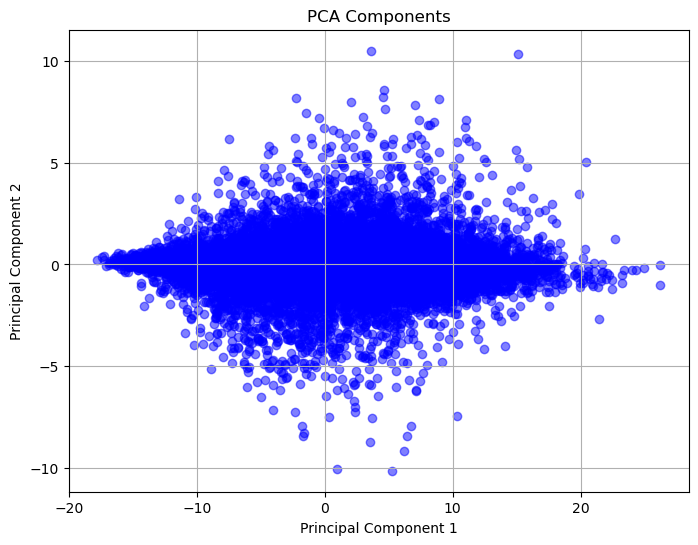

In [14]:
# Plot PCA components
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], color='blue', alpha=0.5)
plt.title('PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [15]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

In [16]:
# Print explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.8740497  0.02475553 0.00986367 0.00615992 0.00473097 0.00453847
 0.00400024 0.00314401 0.00278649 0.00272342]


In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# Example model-less cross-validation
scores = cross_val_score(pca, scaled_features)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean():.2f}")

Cross-Validation Scores: [-16.9636801  -17.27901079 -16.34247948 -15.96777126 -17.22711085]
Mean Cross-Validation Score: -16.76


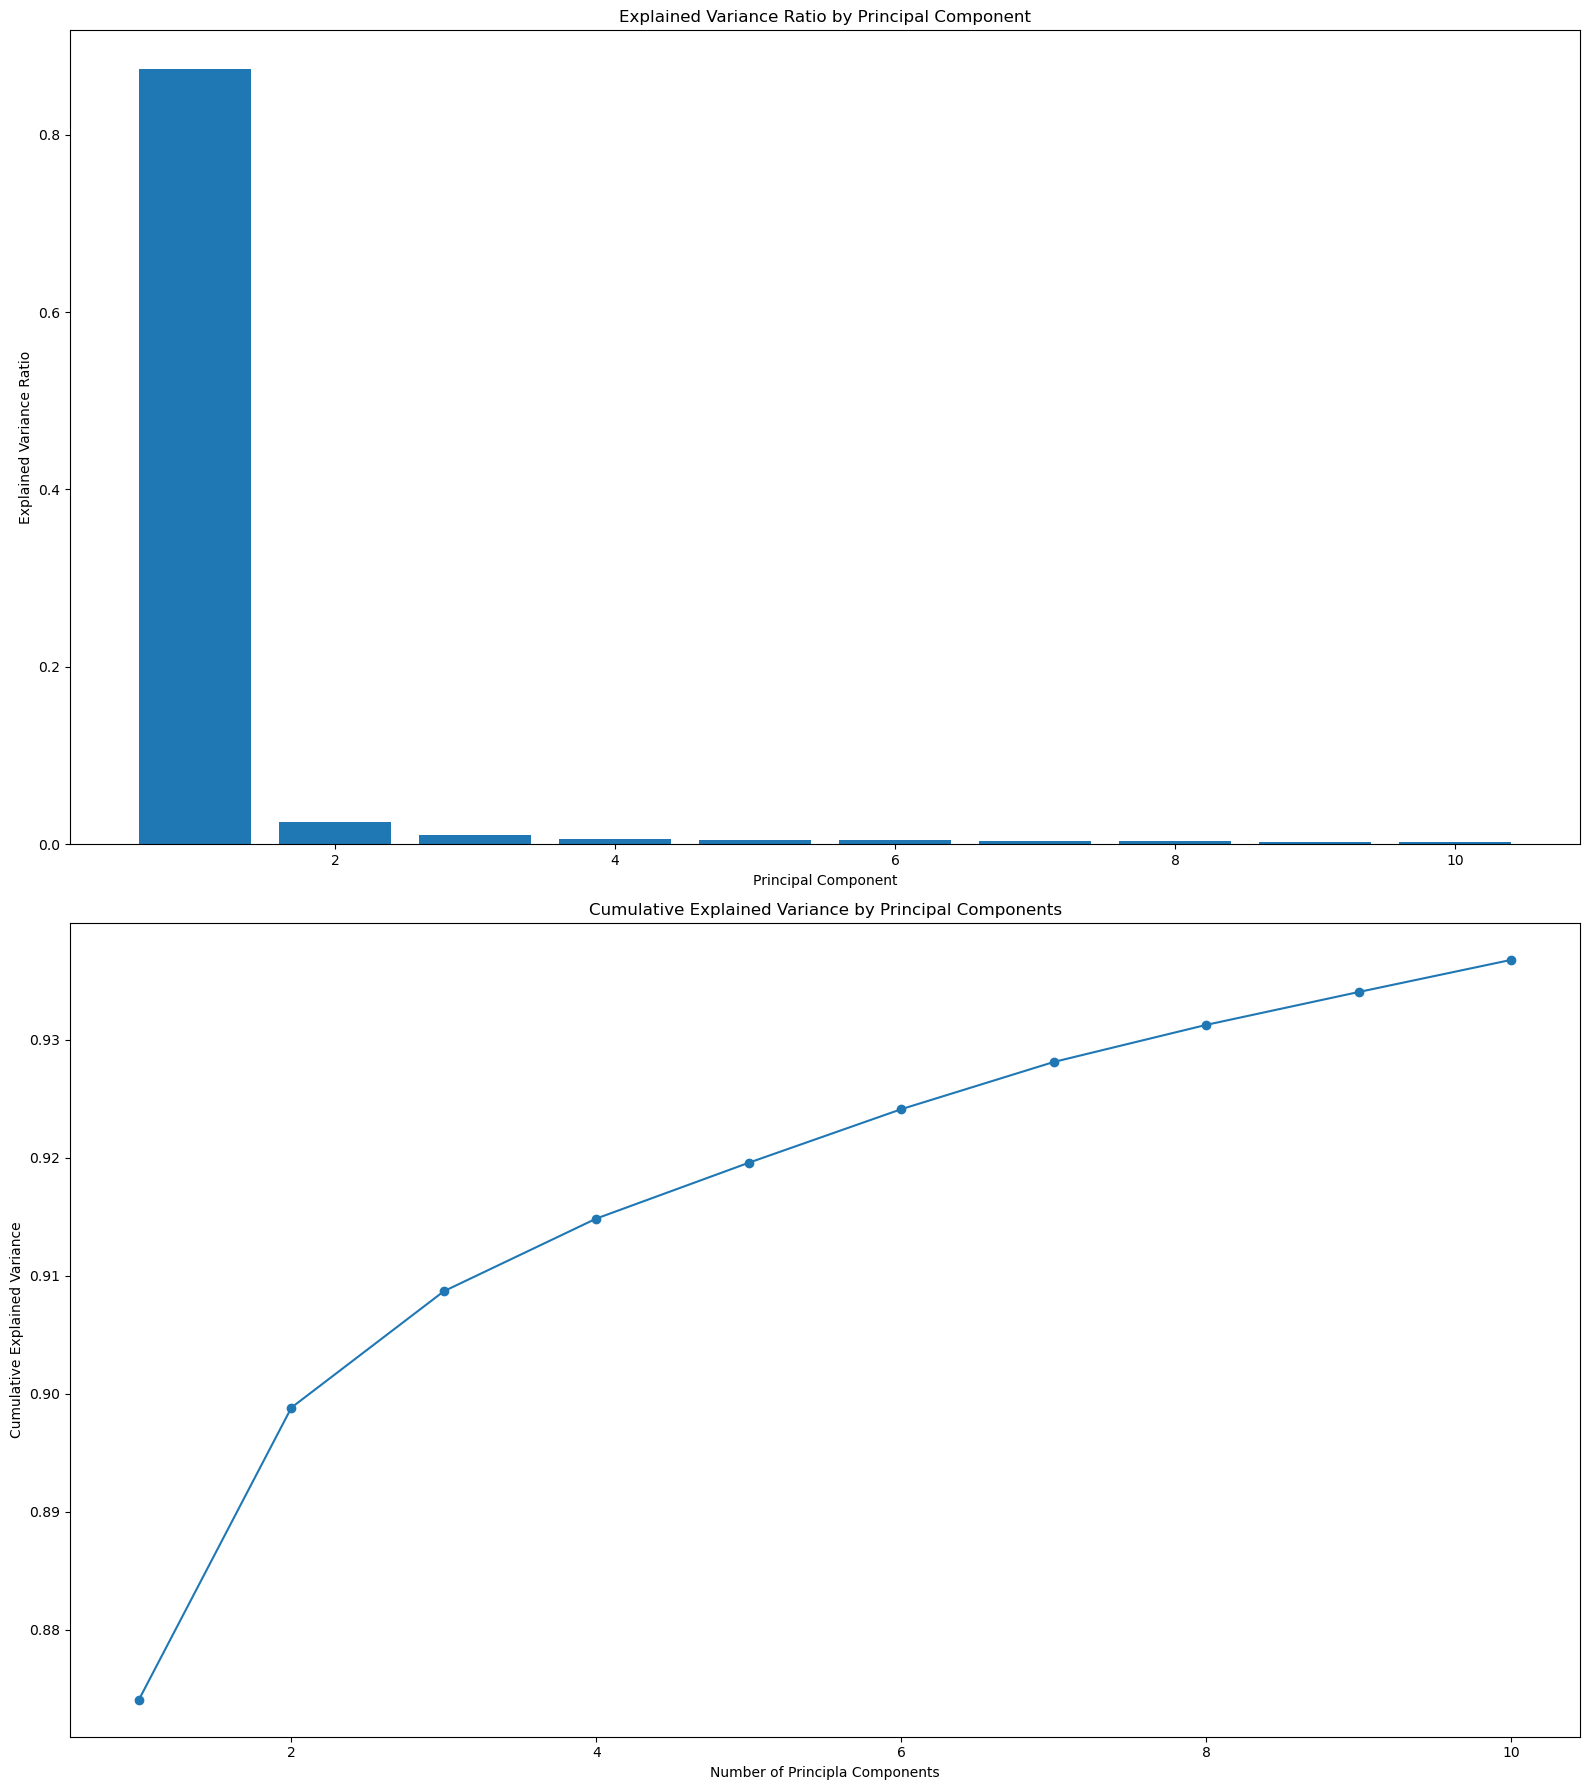

In [19]:
# Create a 2*1 grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,18))

# Plot the explained variance ratio in the first subplot
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance Ratio by Principal Component')

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance in the second subplot
ax2.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
ax2.set_xlabel('Number of Principla Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance by Principal Components')

# Display the figure
plt.tight_layout()
plt.show()